### Data Collection


### NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
from bs4 import BeautifulSoup
import pandas as pd

#PAGE WAS SAVED AS NCDC.html
with open("NCDC.html") as fp:
	soup = BeautifulSoup(fp, 'lxml')

title = soup.title

table = soup.find(class_='table-responsive').find('thead')
table_head = soup.find(class_='table-responsive').find('thead').find('tr')

columns = [i.string for i in table_head.contents]
new_columns = []
for i in columns:
	
	if i != '\n':
		new_columns.append(i)

COLUMNS = new_columns


########################################3
table_body = soup.find(class_='table-responsive').find('tbody')
all_rows = soup.find(class_='table-responsive').find('tbody').find_all('tr')


def clean_(value_):
	return value_.string.replace('\n', '')

cleaned_rows = []
for row in all_rows:
	row_data = {}

	state = row.td
	clean_state = clean_(state)

	no_cases_lab = state.next_sibling.next_sibling
	clean_no_cases_lab = clean_(no_cases_lab)

	no_cases_adm = no_cases_lab.next_sibling.next_sibling
	clean_no_cases_adm = clean_(no_cases_adm)

	no_discharged = no_cases_adm.next_sibling.next_sibling
	clean_no_discharged = clean_(no_discharged)

	no_deaths = no_discharged.next_sibling.next_sibling
	clean_no_deaths = clean_(no_deaths)


	row_data[COLUMNS[0]] = clean_state
	row_data[COLUMNS[1]] = clean_no_cases_lab
	row_data[COLUMNS[2]] = clean_no_cases_adm
	row_data[COLUMNS[3]] = clean_no_discharged
	row_data[COLUMNS[4]] = clean_no_deaths

	cleaned_rows.append(row_data)
	#print(row.prettify())
	#print(state.prettify())
columns_0, columns_1, columns_2, columns_3, columns_4 = [], [], [], [], []


for i in cleaned_rows:
	columns_0.append(i[COLUMNS[0]])
	columns_1.append(i[COLUMNS[1]])
	columns_2.append(i[COLUMNS[2]])
	columns_3.append(i[COLUMNS[3]])
	columns_4.append(i[COLUMNS[4]])

my_dict = {
	COLUMNS[0]: columns_0,
	COLUMNS[1]: columns_1,
	COLUMNS[2]: columns_2,
	COLUMNS[3]: columns_3,
	COLUMNS[4]: columns_4,
}

# Saving the NCDC data to a DataFrame object.

nigerian_covid = pd.DataFrame(my_dict)
nigerian_covid.to_csv('Nigerian Covid.csv')



### John Hopkins Data Repository
The data from the below links have been downloaded 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

#### Parsing data into dataframe

In [3]:
confirmed = pd.read_csv('confirmed_series.csv')
death = pd.read_csv('deaths_series.csv')
recovered = pd.read_csv('recovered.csv')

### External Data 
* The external data will be parsed into a Dataframe
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [4]:
covid_external = pd.read_csv('covid_external.csv')
budget_data = pd.read_csv('Budget data.csv')
real_gdp = pd.read_csv('RealGDP.csv')

### Viewing the data
Obtaining basic information about the data using the `head()` and `info()` method.

In [5]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [6]:
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [7]:
real_gdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [8]:
nigerian_covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,157","1,014","102,372",771
1,FCT,"29,504",15,"29,240",249
2,Rivers,"18,093",44,"17,894",155
3,Kaduna,"11,615",12,"11,514",89
4,Oyo,"10,336",2,"10,132",202


### Data Cleaning and Preparation
From the information obtained above, I will need to fix the data format. 
<br>
The cleaning includes: 
* Converting to appropriate data types.
* Renaming the columns of the scraped data.
* Removing comma(,) in the figures
* Extracting daily data for Nigeria from the Global daily cases data

### Cleaning the scraped data

In [9]:
nigerian_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


#### Removing commas from figures

In [10]:
nigerian_covid['No. of Deaths'] = nigerian_covid['No. of Deaths'].str.replace(',', '').astype(int)
nigerian_covid['No. Discharged'] = nigerian_covid['No. Discharged'].str.replace(',', '').astype(int)
nigerian_covid['No. of Cases (on admission)'] = nigerian_covid['No. of Cases (on admission)'].str.replace(',', '').astype(int)
nigerian_covid['No. of Cases (Lab Confirmed)'] = nigerian_covid['No. of Cases (Lab Confirmed)'].str.replace(',', '').astype(int)

In [11]:
nigerian_covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104157,1014,102372,771
1,FCT,29504,15,29240,249
2,Rivers,18093,44,17894,155
3,Kaduna,11615,12,11514,89
4,Oyo,10336,2,10132,202


In [12]:
nigerian_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1016.0+ bytes


#### Writing a generic function to clean data

In [13]:
def clean_series(series):
    series = series[series['Country/Region'] == 'Nigeria']
    series.columns
    series=series.drop(['Lat', 'Long', 'Country/Region', 'Province/State'], axis=1).transpose().reset_index()
    series.columns = ['Date', 'Cases']
    series['Date'] = pd.to_datetime(series['Date'])
    return series

In [14]:
confirmed_ = clean_series(confirmed)
confirmed_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1020 non-null   datetime64[ns]
 1   Cases   1020 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 16.1 KB


#### Getting a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [15]:
recovered_ = clean_series(recovered)

In [16]:
recovered_.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


#### Getting a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [17]:
death_ = clean_series(death)

In [18]:
death_.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


### Analysis
Analysis on the datasets using visualization and correlation analysis
<br>

#### Generating a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [19]:
top_10_lab_confirmed = nigerian_covid.sort_values('No. of Cases (Lab Confirmed)', ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 confirmed COVID cases in Nigeria')

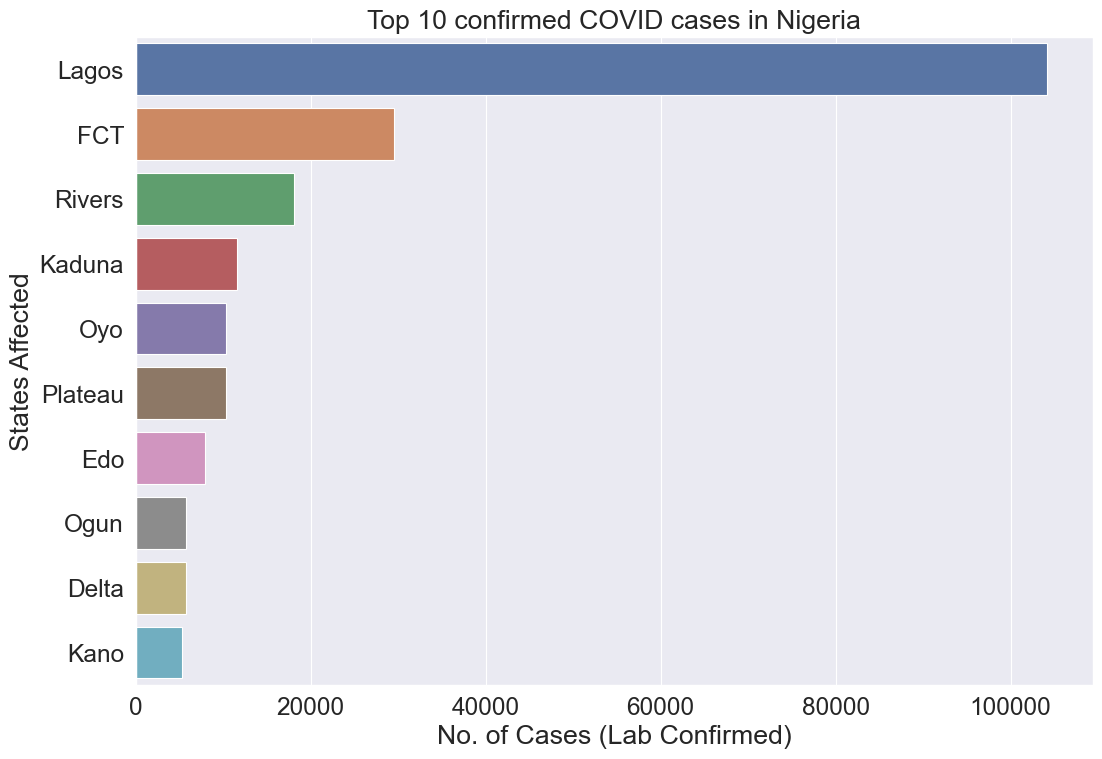

In [20]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_context("paper", font_scale=2)  
sns.barplot(data=top_10_lab_confirmed, x='No. of Cases (Lab Confirmed)', y='States Affected').set_title('Top 10 confirmed COVID cases in Nigeria')

In [21]:
nigerian_covid.sum()

States Affected                 LagosFCTRiversKadunaOyoPlateauEdoOgunDeltaKano...
No. of Cases (Lab Confirmed)                                               266138
No. of Cases (on admission)                                                  3523
No. Discharged                                                             259460
No. of Deaths                                                                3155
dtype: object

#### Generating a plot that shows the Top 10 states in terms of Discharged Covid cases.

Text(0.5, 1.0, 'Top 10 discharged cases in Nigeria')

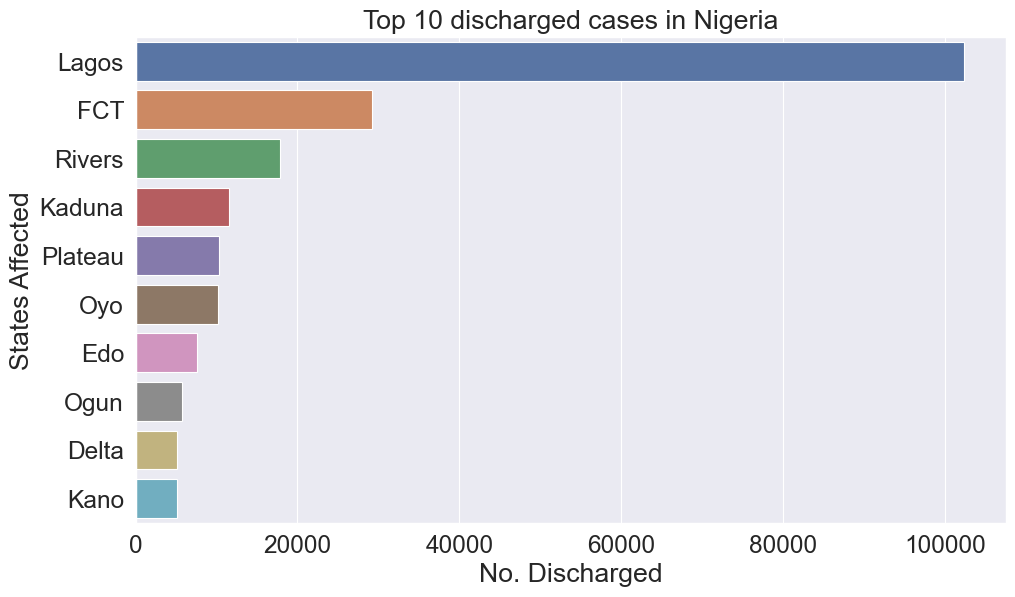

In [22]:
top_10_discharged = nigerian_covid.sort_values('No. Discharged', ascending=False).head(10)
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("paper", font_scale=2)  
sns.barplot(data=top_10_discharged, x='No. Discharged', y='States Affected').set_title('Top 10 discharged cases in Nigeria')

Text(0.5, 1.0, 'Top 10 COVID  death cases in Nigeria')

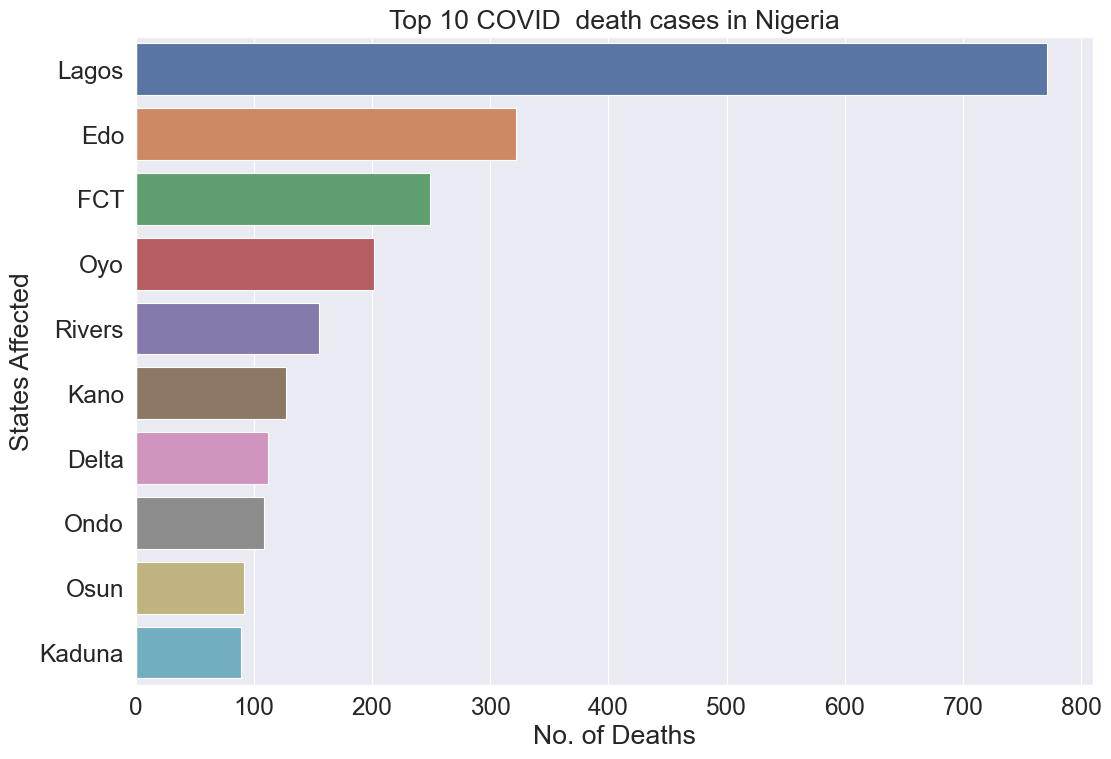

In [23]:
top_10_discharged = nigerian_covid.sort_values('No. of Deaths', ascending=False).head(10)
sns.set(rc={'figure.figsize':(11,8)})
sns.set_context("paper", font_scale=2.0)  
sns.barplot(data=top_10_discharged, x='No. of Deaths', y='States Affected').set_title('Top 10 COVID  death cases in Nigeria')

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

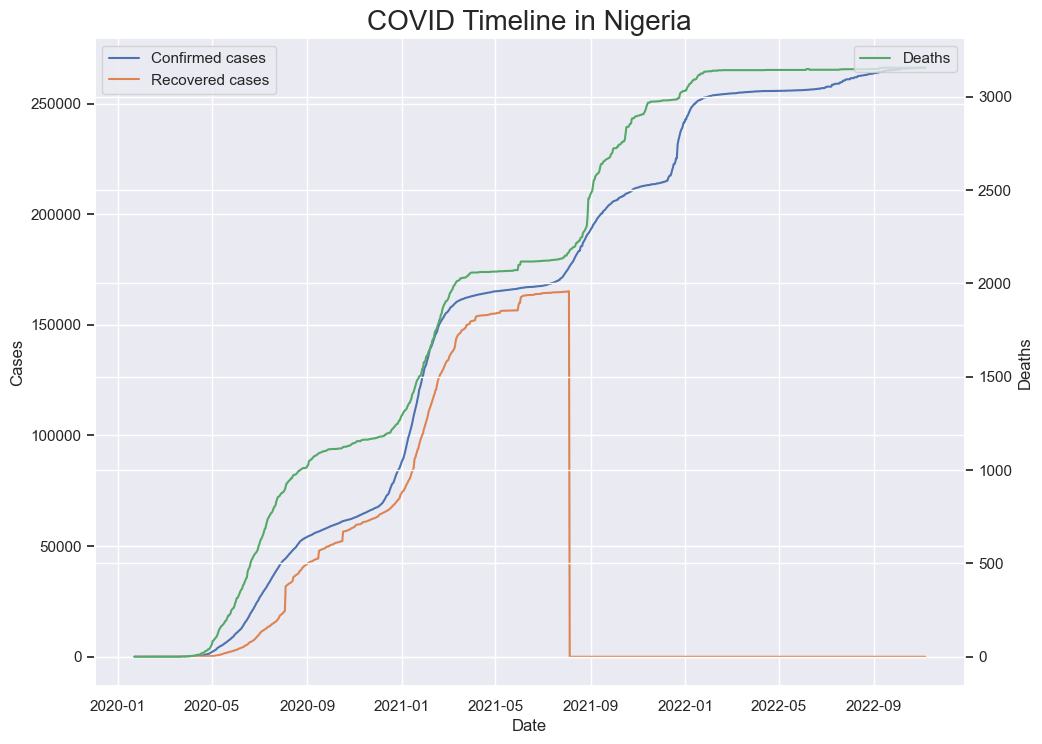

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(data=confirmed_, x='Date', y='Cases', label='Confirmed cases')
ax=sns.lineplot(data=recovered_, x='Date', y='Cases', label='Recovered cases')

ax2=ax.twinx()
death_['Death Cases'] = death_['Cases']
sns.lineplot(data=death_, x='Date', y='Cases', ax=ax2, label='Deaths', color='g').set_title('COVID Timeline in Nigeria', fontsize=20)
ax2.set_ylabel('Deaths')
ax2.legend(loc='upper right')

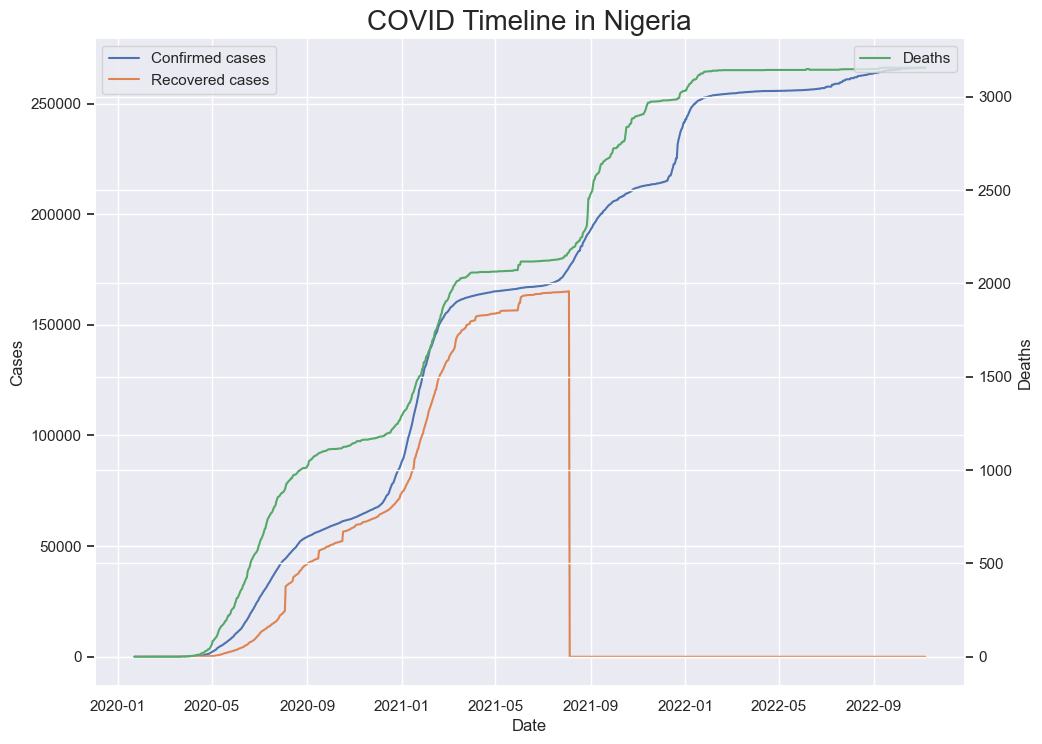

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(data=confirmed_, x='Date', y='Cases', label='Confirmed cases')
ax=sns.lineplot(data=recovered_, x='Date', y='Cases', label='Recovered cases')

ax2=ax.twinx()
death_['Death Cases'] = death_['Cases']
sns.lineplot(data=death_, x='Date', y='Cases', ax=ax2, label='Deaths', color='g').set_title('COVID Timeline in Nigeria', fontsize=20)
ax2.set_ylabel('Deaths')
ax2.legend(loc='upper right')

Text(0.5, 1.0, 'COVID Deaths in Nigeria')

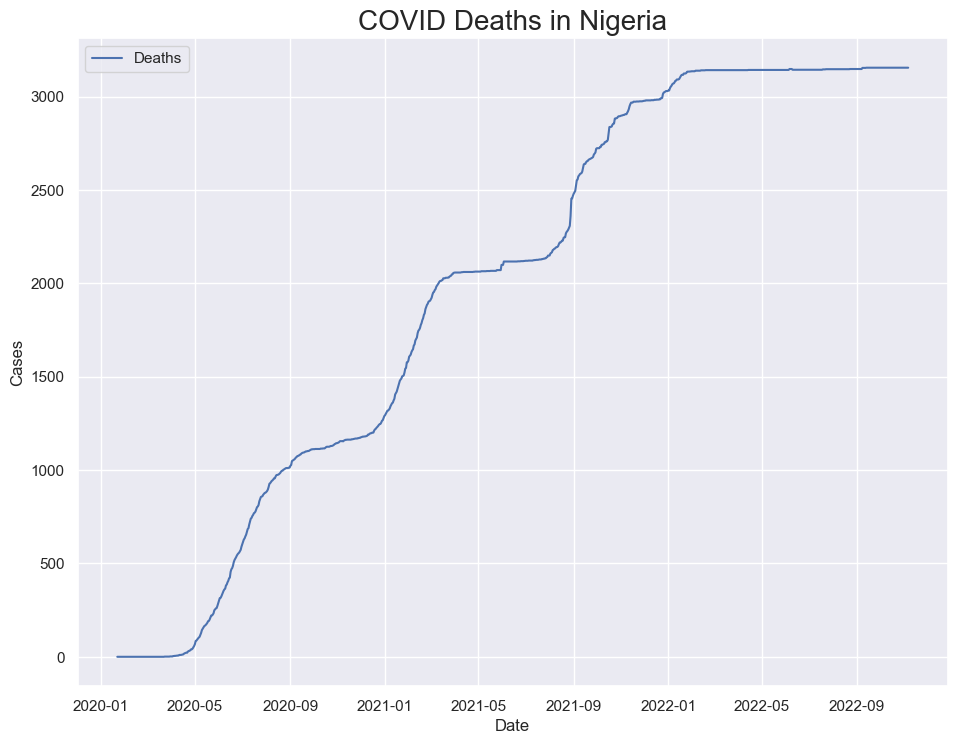

In [26]:
sns.lineplot(data=death_, x='Date', y='Cases', label='Deaths').set_title('COVID Deaths in Nigeria', fontsize=20)

### Determining the daily infection rate and generating a line plot

In [27]:
confirmed_['Differential'] = confirmed_.diff()['Cases']
confirmed_['Differential'].fillna(0, inplace=True)
confirmed_

,Date,Cases,Differential
0,2020-01-22,0,0.0
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0
...,...,...,...
1015,2022-11-02,266138,0.0
1016,2022-11-03,266138,0.0
1017,2022-11-04,266138,0.0
1018,2022-11-05,266192,54.0


In [28]:
confirmed_['Infection Rate']=confirmed_['Differential']

Text(0.5, 1.0, 'Infection Rate')

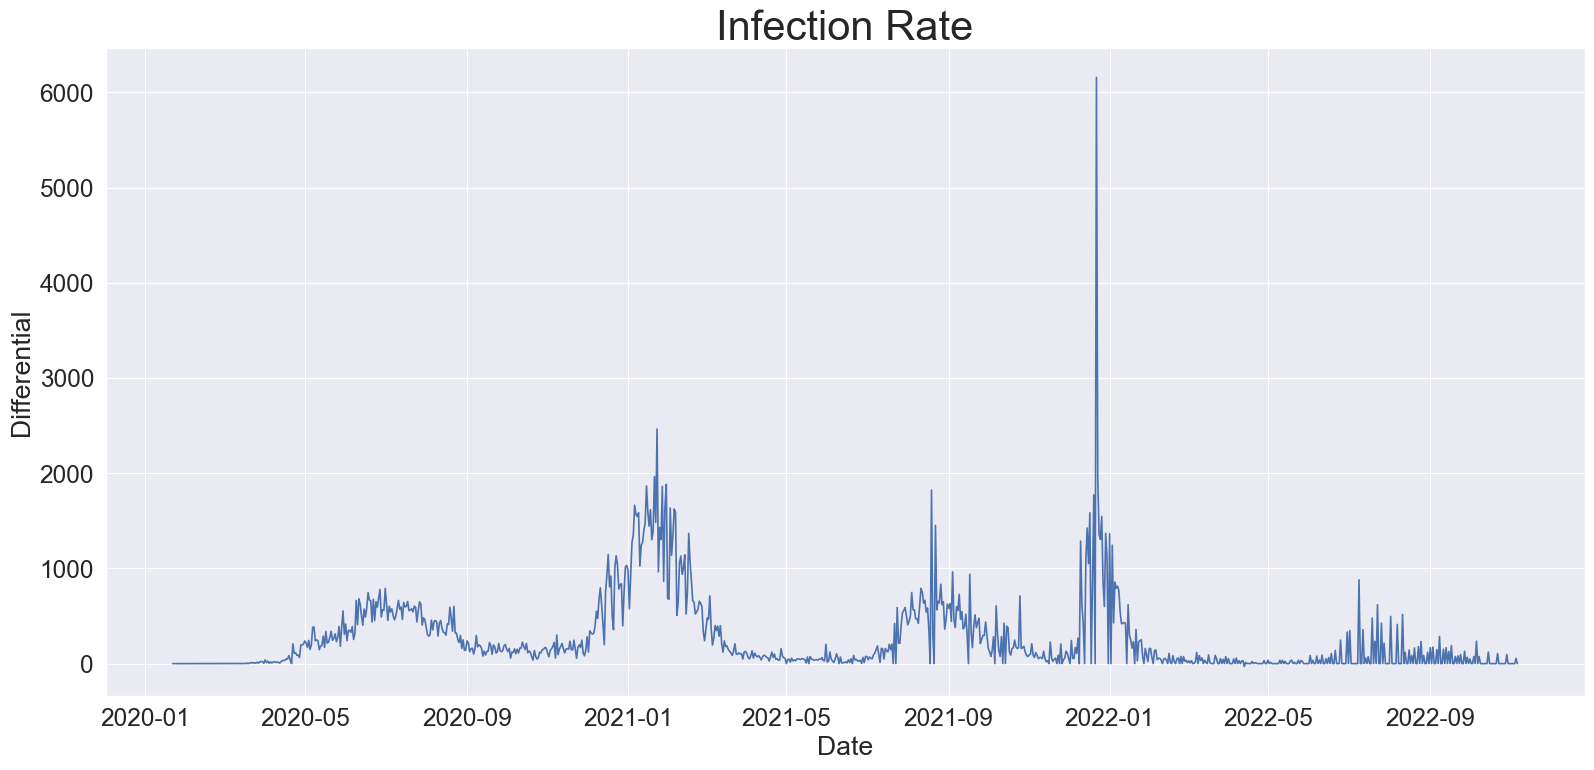

In [29]:
sns.set(rc={'figure.figsize': (17,8)})

sns.set_context("paper", font_scale=2.0)  
sns.lineplot(data=confirmed_, x='Date', y='Differential').set_title('Infection Rate', fontsize=30)

### Calculate maximum infection rate for a day (Number of new cases) and determining the date

In [30]:
maximum_infection_rate = confirmed_['Differential'].max()
maximum_infection_rate

6158.0

In [31]:
maximum_infection_day = confirmed_[confirmed_['Differential'] == maximum_infection_rate]['Date']
maximum_infection_day

700   2021-12-22
Name: Date, dtype: datetime64[ns]

<h4>22nd December 2021 has the highest number of new infection cases</h4>

In [32]:
death_['Differential'] = death_.diff()['Cases']
death_['Differential'].fillna(0, inplace=True)
death_

,Date,Cases,Death Cases,Differential
0,2020-01-22,0,0,0.0
1,2020-01-23,0,0,0.0
2,2020-01-24,0,0,0.0
3,2020-01-25,0,0,0.0
4,2020-01-26,0,0,0.0
...,...,...,...,...
1015,2022-11-02,3155,3155,0.0
1016,2022-11-03,3155,3155,0.0
1017,2022-11-04,3155,3155,0.0
1018,2022-11-05,3155,3155,0.0


In [33]:
death_['Death Rate']=death_['Differential']

Text(0.5, 1.0, 'Death Rate')

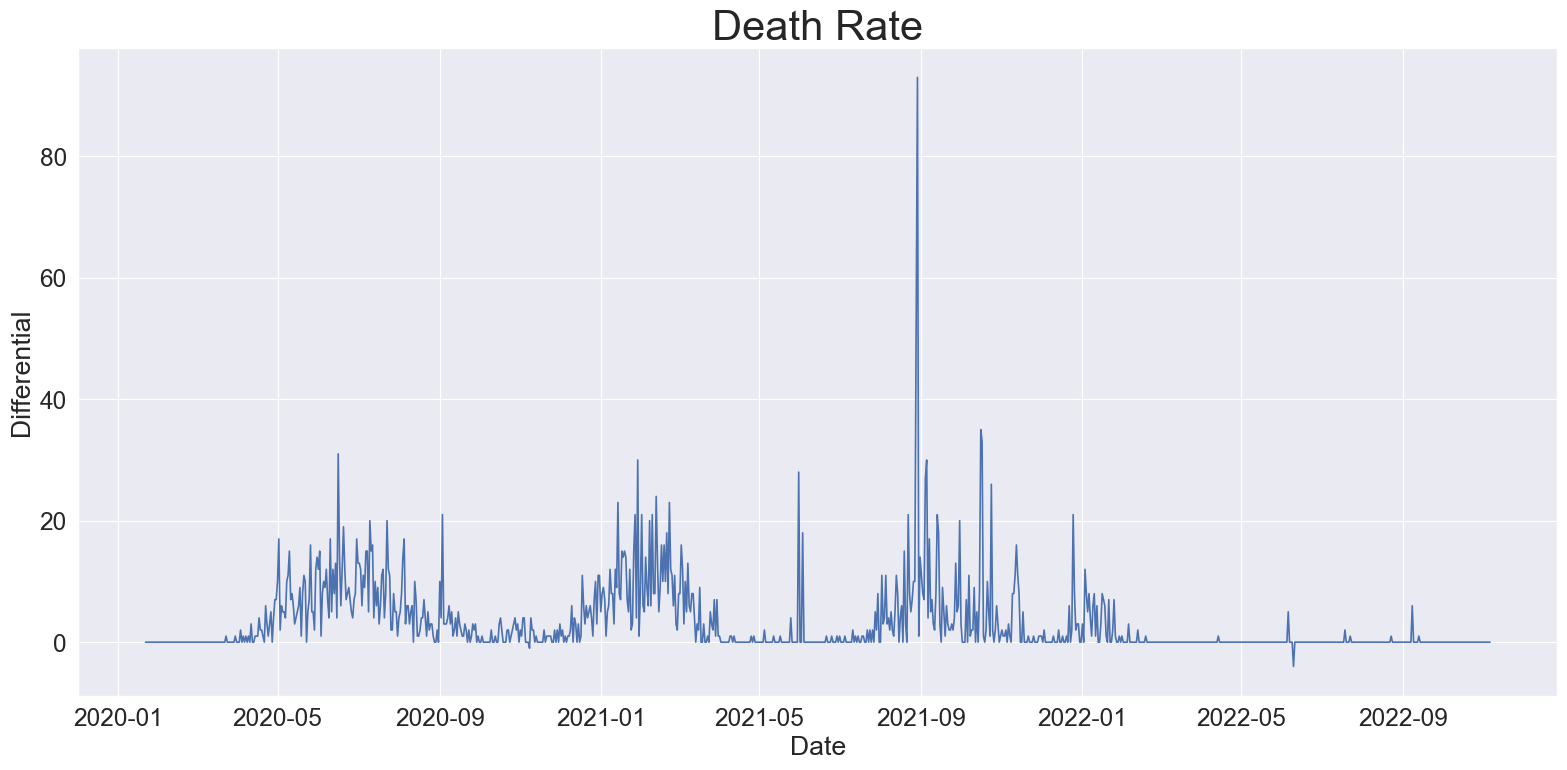

In [34]:
sns.set(rc={'figure.figsize': (17,8)})
sns.set_context("paper", font_scale=2.0) 
sns.lineplot(data=death_, x='Date', y='Differential').set_title('Death Rate', fontsize=30)

In [35]:
maximum_death_rate = death_['Differential'].max()
maximum_death_rate

93.0

In [36]:
maximum_death_day = death_[death_['Differential'] == maximum_death_rate]['Date']
maximum_death_day

585   2021-08-29
Name: Date, dtype: datetime64[ns]

### 29th August 2021 has the highest number of deaths with 93 deaths



### Joining the external dataset and the NCDC COVID-19 dataset to find a relationship between the overall community index and the top 10 cases using visualization

In [37]:
datasets = {
    'covid_external': covid_external,
    'budget_data': budget_data,
    'real_gdp': real_gdp,
    'confirmed': confirmed_,
    'death': death_,
    'recovered': recovered_,
    'nigerian_covid':nigerian_covid
}
data_titles = list(datasets.keys())

In [38]:
data_titles

['covid_external',
 'budget_data',
 'real_gdp',
 'confirmed',
 'death',
 'recovered',
 'nigerian_covid']

In [39]:
covid_external

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [40]:
nigerian_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1016.0+ bytes


#### Merging the datasets

In [41]:
nigerian_merge = pd.merge(nigerian_covid, covid_external, left_on='States Affected', right_on='states')

In [42]:
top_10_confirmed_cases_ = nigerian_merge.nlargest(10, 'No. of Cases (Lab Confirmed)')

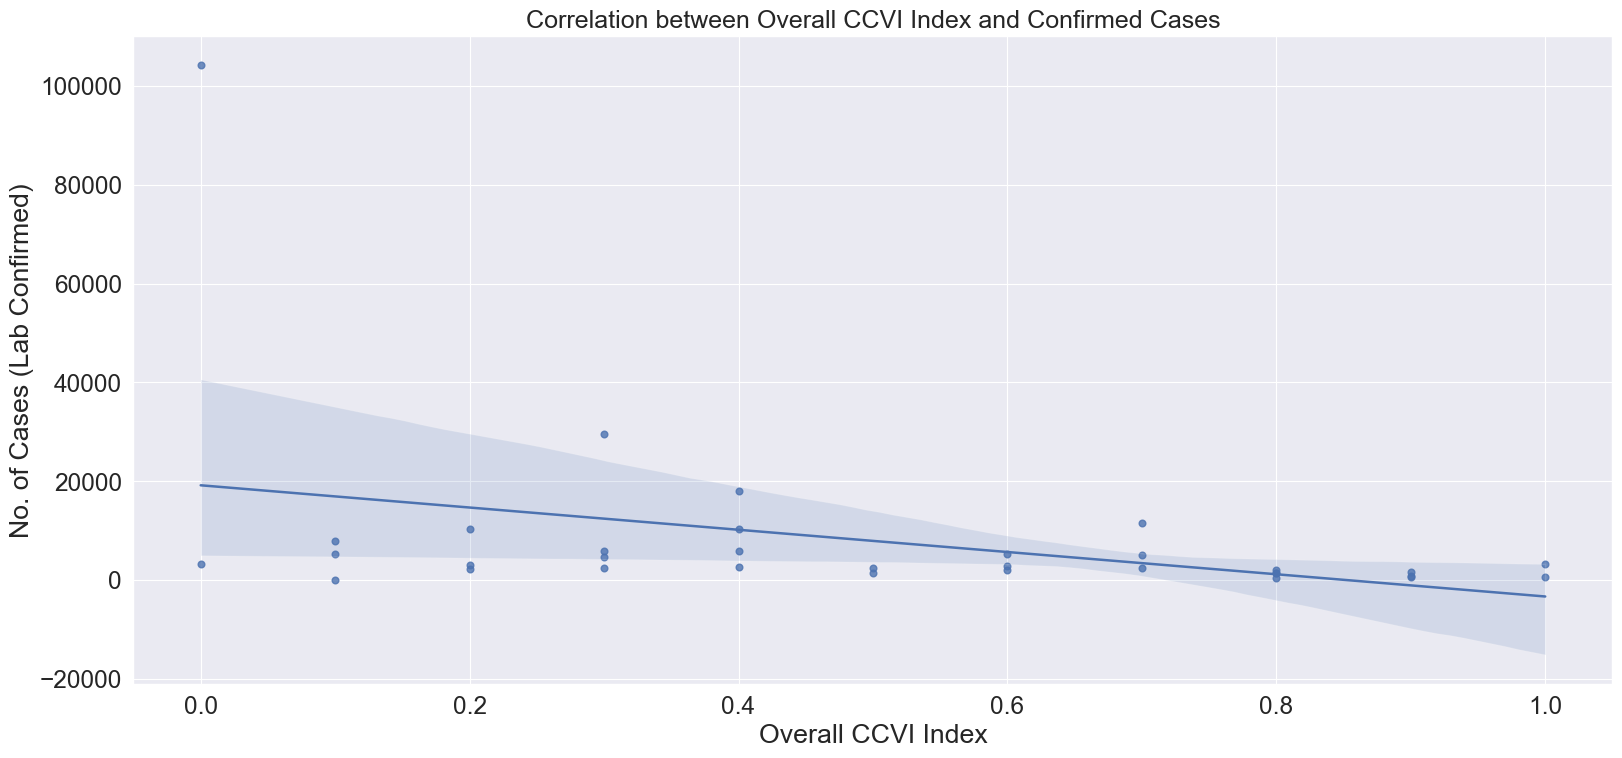

In [43]:
ax=sns.regplot(data=nigerian_merge, x='Overall CCVI Index', y='No. of Cases (Lab Confirmed)', label='Cases').set_title('Correlation between Overall CCVI Index and Confirmed Cases', fontsize=18)


<AxesSubplot:xlabel='states', ylabel='Overall CCVI Index'>

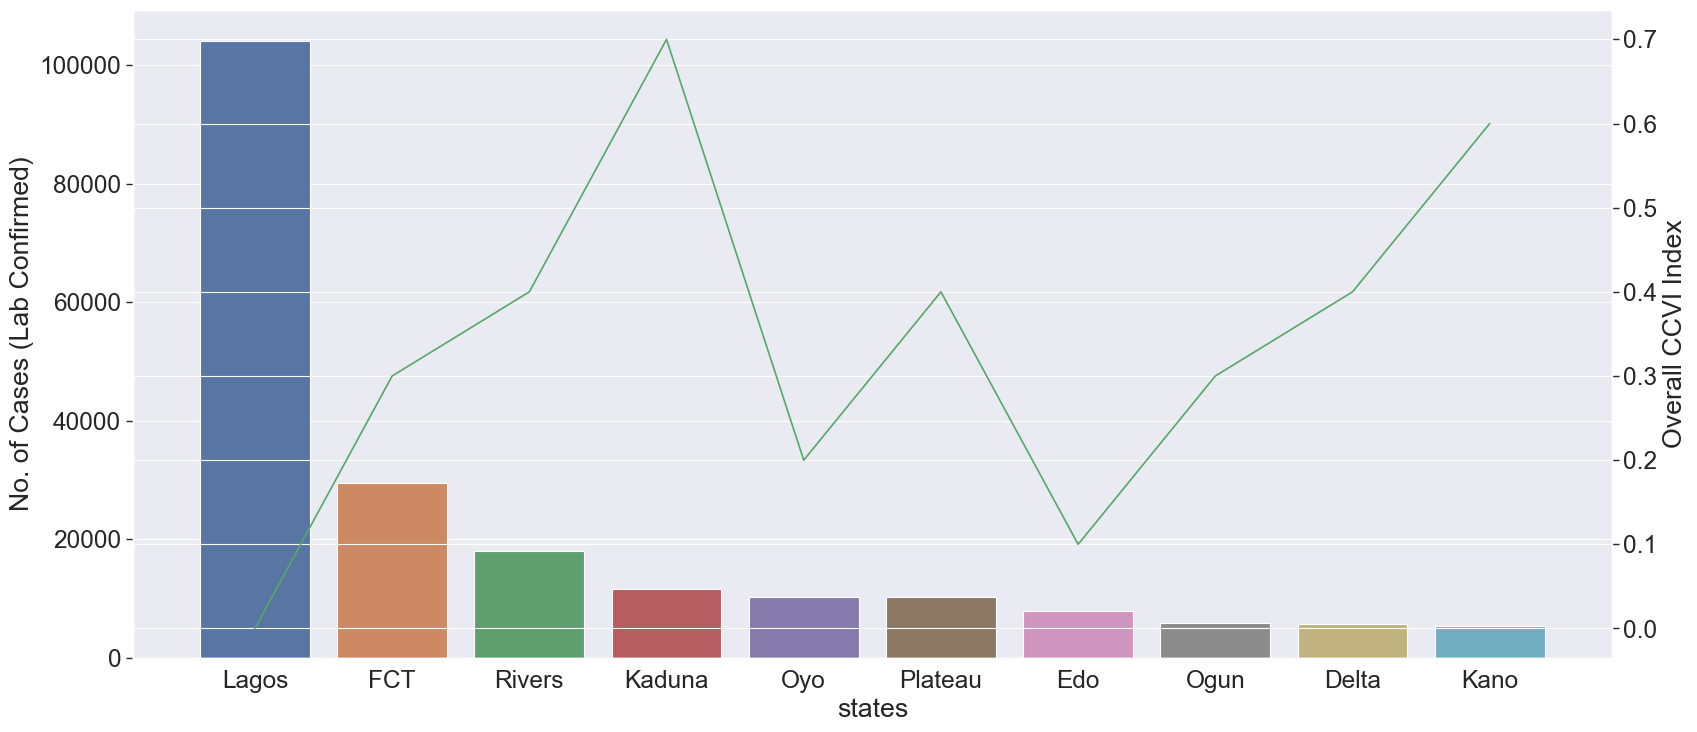

In [44]:
ax=sns.barplot(data=top_10_confirmed_cases_, x='states', y='No. of Cases (Lab Confirmed)', label='Cases')
ax2=ax.twinx()
sns.lineplot(data=top_10_confirmed_cases_, x='states', y='Overall CCVI Index', color='g', ax=ax2)

<h3>The Vulnerability Index by itself is not a good predictor of the infection volume</h3>

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

Text(0.5, 1.0, 'Correla')

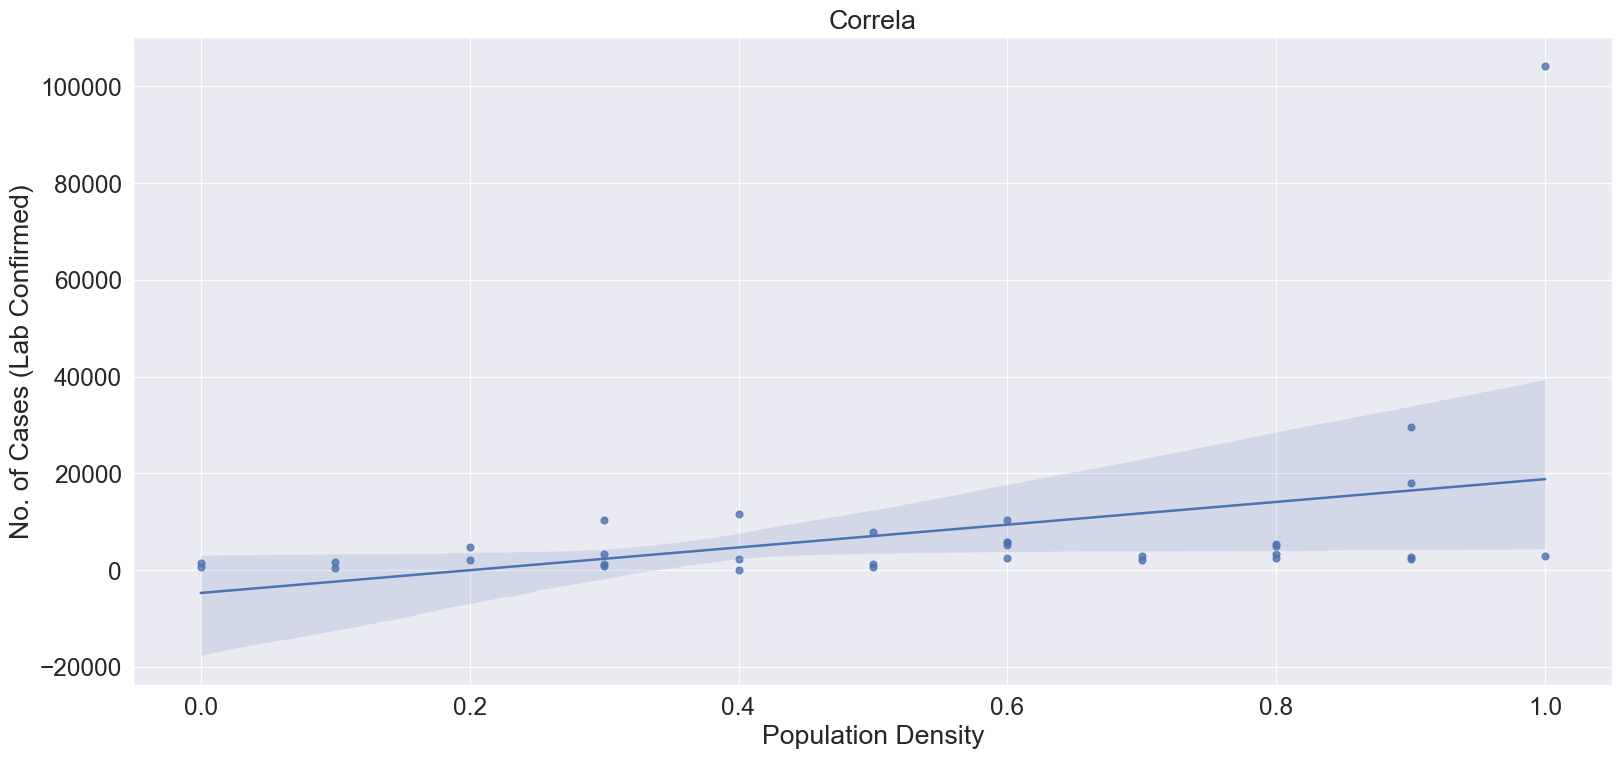

In [45]:
sns.regplot(data=nigerian_merge, y='No. of Cases (Lab Confirmed)', x='Population Density').set_title('Correla')

In [46]:
top_10_confirmed_cases_['Death Rate'] = top_10_confirmed_cases_['No. of Deaths']/top_10_confirmed_cases_['No. of Cases (Lab Confirmed)']

In [47]:
top_10_confirmed_cases_['Death Rate']

0    0.007402
1    0.008440
2    0.008567
3    0.007663
4    0.019543
5    0.007260
6    0.040621
7    0.014114
8    0.019284
9    0.023765
Name: Death Rate, dtype: float64

In [48]:
top_10_confirmed_cases_.corr(method='spearman')

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Death Rate
No. of Cases (Lab Confirmed),1.000000,0.109423,0.987879,0.490909,0.078788,-0.350811,-0.538249,0.901389,0.293590,-0.141555,0.430820,-0.232426,-0.342814,-0.449850,-0.624242
No. of Cases (on admission),0.109423,1.000000,0.127660,0.224925,0.522799,0.148159,-0.530685,0.238419,-0.033743,0.009260,0.666717,0.107364,0.393873,-0.234756,-0.170214
No. Discharged,0.987879,0.127660,1.000000,0.418182,0.018182,-0.301574,-0.581064,0.858172,0.379221,-0.203101,0.381584,-0.201843,-0.342814,-0.480245,-0.709091
No. of Deaths,0.490909,0.224925,0.418182,1.000000,0.115152,-0.695467,-0.067281,0.611216,-0.617763,-0.393893,0.621612,-0.140679,-0.006233,0.036474,0.248485
Population,0.078788,0.522799,0.018182,0.115152,1.000000,0.270801,-0.397570,0.160521,0.036699,0.178483,0.430820,0.134562,0.585900,-0.389060,-0.018182
Overall CCVI Index,-0.350811,0.148159,-0.301574,-0.695467,0.270801,1.000000,-0.301248,-0.373043,0.565228,0.487500,-0.328125,0.599390,0.265844,-0.407438,-0.116937
Age,-0.538249,-0.530685,-0.581064,-0.067281,-0.397570,-0.301248,1.000000,-0.417464,-0.537037,0.027951,-0.419263,-0.429012,-0.166696,0.920263,0.642229
Epidemiological,0.901389,0.238419,0.858172,0.611216,0.160521,-0.373043,-0.417464,1.000000,0.081000,-0.015674,0.470222,-0.283501,-0.238106,-0.253900,-0.382782
Fragility,0.293590,-0.033743,0.379221,-0.617763,0.036699,0.565228,-0.537037,0.081000,1.000000,0.108698,-0.192550,0.067901,-0.251617,-0.576698,-0.752325
Health System,-0.141555,0.009260,-0.203101,-0.393893,0.178483,0.487500,0.027951,-0.015674,0.108698,1.000000,-0.150000,0.170811,0.000000,-0.015433,0.067700


<h3>Analysing just the states with top ten cases, there is a positive correlation between the population density and the number of infection cases but it is clear that the patients requiring acute care are the aged as the spearman correlation is highest between Acute IHR and Age. Another thing to take note of is that the overall ccvi index is negatively correlated to the number of deaths. This means the regions with the lower ccvi are more likely to survive for some reason. But considering that the data is bias, we can't make a conclusion. The death rate also has a high positive correlation to the age. The population density is positively correlated with the number of infections and deaths.</h3>

#### There is also a slightly negative correlation between the death rate and population density. This is a signal that herd immunity could be a feasible solution

In [49]:
nigerian_merge['Death Rate'] = nigerian_merge['No. of Deaths']/nigerian_merge['No. of Cases (Lab Confirmed)']

In [50]:
nigerian_merge.corr(method='spearman')

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Death Rate
No. of Cases (Lab Confirmed),1.000000,0.385305,0.998997,0.879953,0.356952,-0.510454,-0.041478,0.591529,-0.266390,-0.154494,0.508365,-0.406619,-0.622918,0.237382,-0.534425
No. of Cases (on admission),0.385305,1.000000,0.372919,0.409361,0.034145,-0.167788,-0.000589,0.340620,-0.004455,-0.090910,0.141596,-0.204810,-0.134752,0.074279,-0.206377
No. Discharged,0.998997,0.372919,1.000000,0.876609,0.347259,-0.505083,-0.041310,0.590354,-0.261018,-0.155837,0.512901,-0.402254,-0.630976,0.240061,-0.543115
No. of Deaths,0.879953,0.409361,0.876609,1.000000,0.299114,-0.467633,-0.091819,0.497107,-0.305738,-0.083670,0.385079,-0.258674,-0.456633,0.198057,-0.145628
Population,0.356952,0.034145,0.347259,0.299114,1.000000,0.003525,-0.425026,0.115486,0.001679,0.156005,0.269470,0.027197,-0.132439,-0.098937,-0.163436
Overall CCVI Index,-0.510454,-0.167788,-0.505083,-0.467633,0.003525,1.000000,-0.306992,-0.365537,0.669196,0.541958,-0.560074,0.736425,0.656213,-0.570794,0.128243
Age,-0.041478,-0.000589,-0.041310,-0.091819,-0.425026,-0.306992,1.000000,0.217930,-0.330185,-0.376814,0.330295,-0.540278,-0.501729,0.817230,0.001679
Epidemiological,0.591529,0.340620,0.590354,0.497107,0.115486,-0.365537,0.217930,1.000000,-0.190356,0.006241,0.430982,-0.508516,-0.618867,0.354970,-0.406718
Fragility,-0.266390,-0.004455,-0.261018,-0.305738,0.001679,0.669196,-0.330185,-0.190356,1.000000,0.305642,-0.498228,0.323187,0.439808,-0.547673,-0.116661
Health System,-0.154494,-0.090910,-0.155837,-0.083670,0.156005,0.541958,-0.376814,0.006241,0.305642,1.000000,-0.460117,0.411303,0.344691,-0.361008,0.157684


### Nationwide, the only remarkable correlation is between Acute IHR and Age. The negative but underwhelming correlation between the population density and the death rate still stands

##### OTHER ANALYSIS

* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [51]:
confirmed_

,Date,Cases,Differential,Infection Rate
0,2020-01-22,0,0.0,0.0
1,2020-01-23,0,0.0,0.0
2,2020-01-24,0,0.0,0.0
3,2020-01-25,0,0.0,0.0
4,2020-01-26,0,0.0,0.0
...,...,...,...,...
1015,2022-11-02,266138,0.0,0.0
1016,2022-11-03,266138,0.0,0.0
1017,2022-11-04,266138,0.0,0.0
1018,2022-11-05,266192,54.0,54.0


In [52]:
nigerian_merge.head(15)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Death Rate
0,Lagos,104157,1014,102372,771,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,0.007402
1,FCT,29504,15,29240,249,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,0.008440
2,Rivers,18093,44,17894,155,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,0.008567
3,Kaduna,11615,12,11514,89,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,0.007663
4,Oyo,10336,2,10132,202,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06,0.019543
5,Plateau,10331,4,10252,75,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,0.007260
6,Edo,7927,4,7601,322,Edo,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09,0.040621
7,Ogun,5810,11,5717,82,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07,0.014114
8,Delta,5808,526,5170,112,Delta,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08,0.019284
9,Kano,5344,97,5120,127,Kano,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87,0.023765


In [53]:
nigerian_merge[nigerian_merge['states'] == 'Borno']

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Death Rate
24,Borno,1629,5,1580,44,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,0.02701


### COVID AND THE ECONOMY
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [54]:
real_gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [55]:
new_df = pd.melt(real_gdp, id_vars=['Year'], var_name='Quarter', value_name='Real GDP')
new_df=new_df.sort_values(['Year', 'Quarter'])

In [56]:
#new_df['Year']=pd.to_datetime(new_df['Year'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      28 non-null     int64  
 1   Quarter   28 non-null     object 
 2   Real GDP  28 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 896.0+ bytes


In [57]:

"""
def year_df(year):
    return new_df[new_df['Year'] == year]

_2014 = year_df(2014)
_2015 = year_df(2015)
_2016 = year_df(2016)
_2017 = year_df(2017)
"""
new_df

,Year,Quarter,Real GDP
0,2014,Q1,15438679.50
7,2014,Q2,16084622.31
14,2014,Q3,17479127.58
21,2014,Q4,18150356.45
1,2015,Q1,16050601.38
8,2015,Q2,16463341.91
15,2015,Q3,17976234.59
22,2015,Q4,18533752.07
2,2016,Q1,15943714.54
9,2016,Q2,16218542.41


In [58]:
# pd.melt(real_gdp, id_vars=['Year'], var_name='Quarter', value_name='Real GDP')

In [59]:
q2s=new_df[new_df['Quarter']=='Q2']
q2s_2020 = q2s[q2s['Year'] == 2020]
val = q2s_2020['Real GDP'].iloc[0]
val

15890000.0

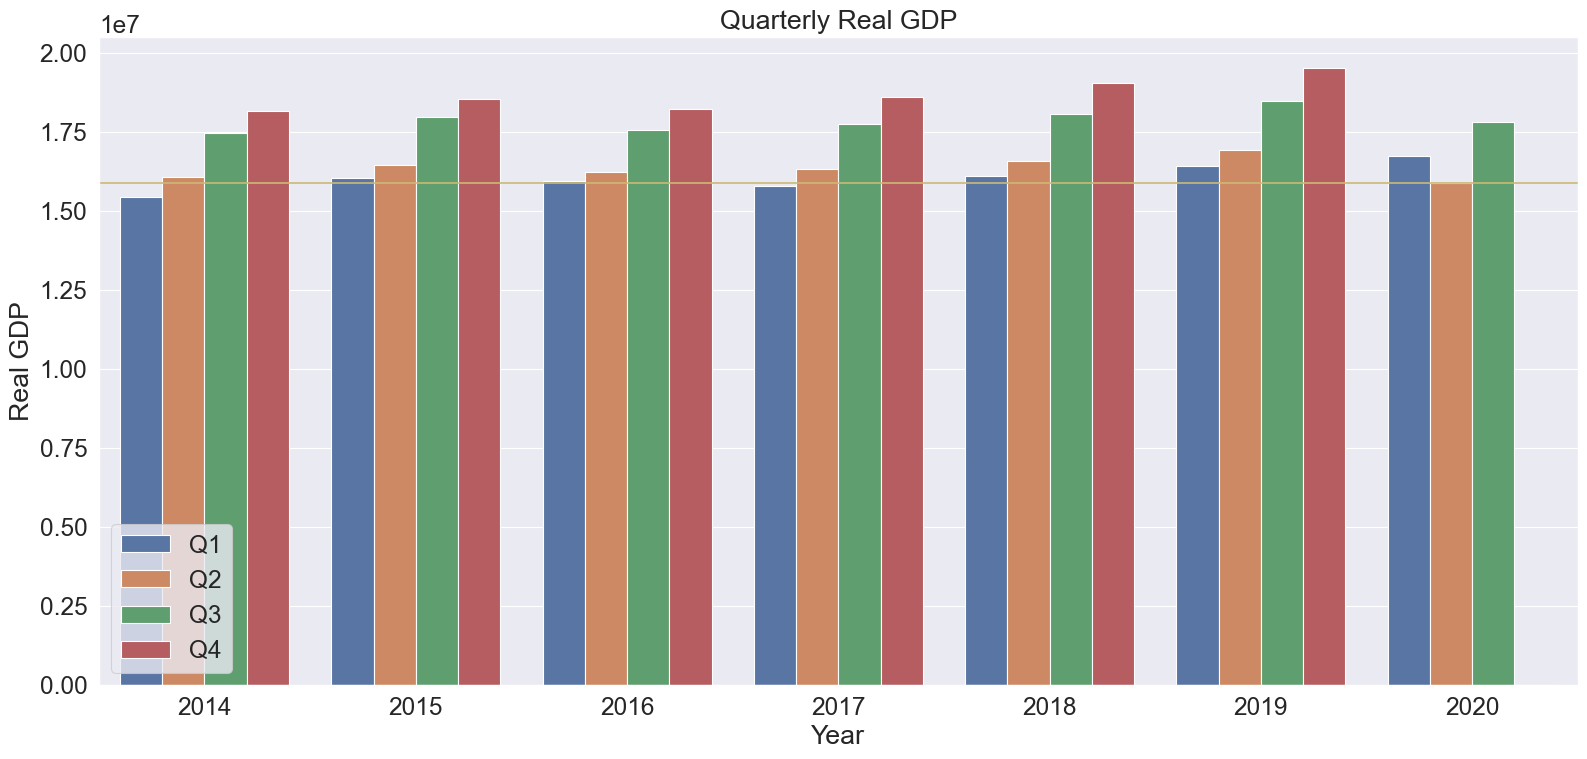

In [60]:
ax=sns.barplot(data=new_df, x= 'Year', y='Real GDP', hue='Quarter')
ax.axhline(val, color='y')
ax.set_title('Quarterly Real GDP')
plt.legend(loc='lower left')

In [61]:
new_df['Differential']=new_df['Real GDP'].diff()
new_df.fillna(0, inplace=True)

<h3> OTHER</h3>

In [62]:
new_df['Percent Change'] = new_df['Real GDP'].pct_change()
new_df.fillna(0, inplace=True)
new_df

,Year,Quarter,Real GDP,Differential,Percent Change
0,2014,Q1,15438679.50,0.00,0.000000
7,2014,Q2,16084622.31,645942.81,0.041839
14,2014,Q3,17479127.58,1394505.27,0.086698
21,2014,Q4,18150356.45,671228.87,0.038402
1,2015,Q1,16050601.38,-2099755.07,-0.115687
8,2015,Q2,16463341.91,412740.53,0.025715
15,2015,Q3,17976234.59,1512892.68,0.091895
22,2015,Q4,18533752.07,557517.48,0.031014
2,2016,Q1,15943714.54,-2590037.53,-0.139747
9,2016,Q2,16218542.41,274827.87,0.017237


In [63]:
new_df['Year Quarter'] = new_df['Year'].astype(str) + new_df['Quarter'].astype(str)
new_df['Year Quarter'] = pd.to_datetime(new_df['Year Quarter'])

<AxesSubplot:xlabel='Date', ylabel='Cases'>

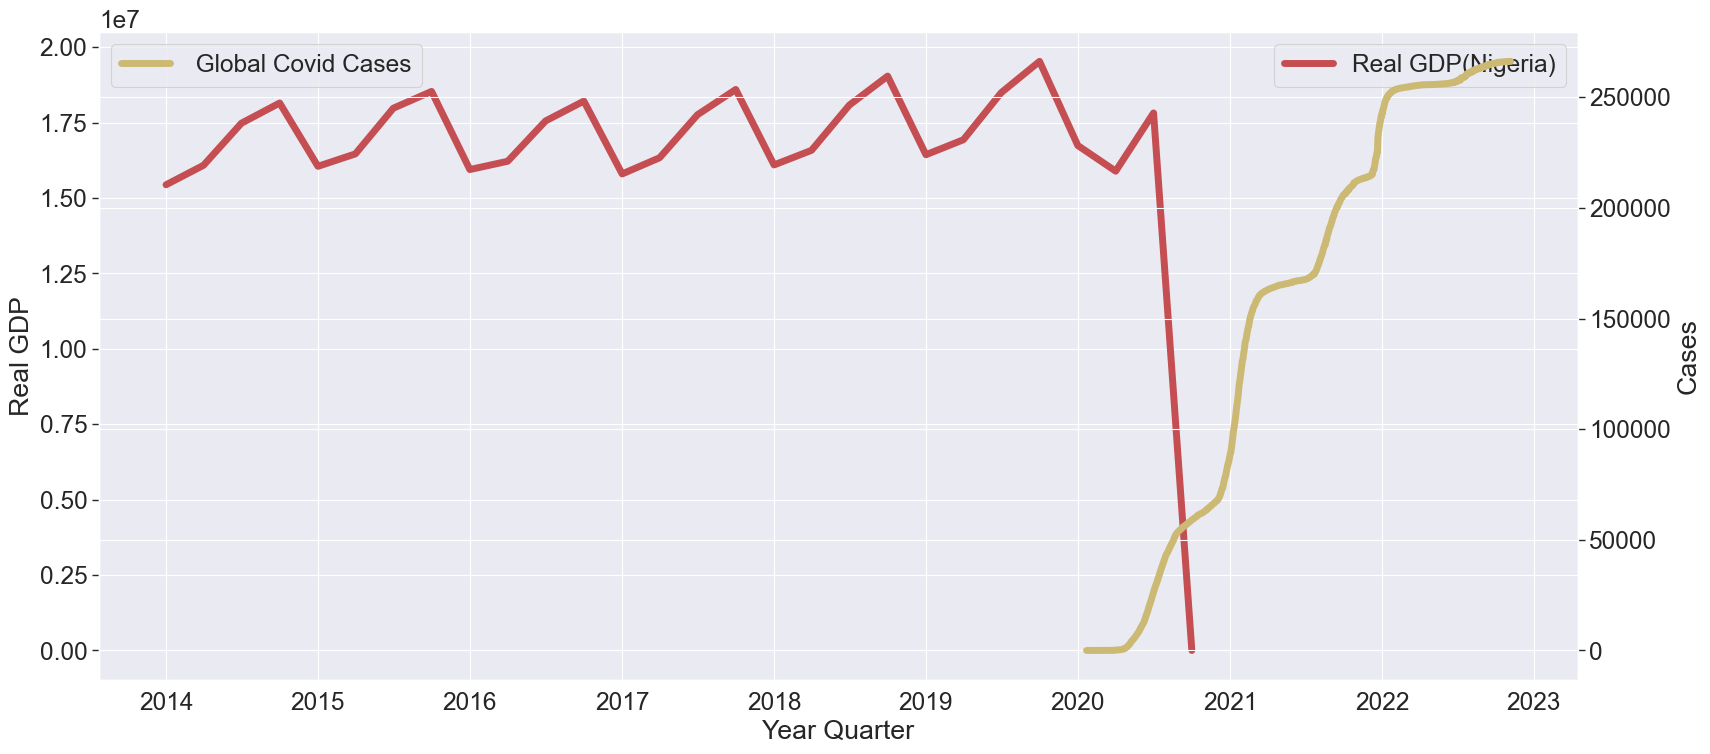

In [64]:
ax=sns.lineplot(data=new_df, x='Year Quarter', y='Real GDP', color='r', linewidth=5, label='Real GDP(Nigeria)')

sns.set_context("paper", font_scale=2.0) 
ax2=ax.twinx()
sns.lineplot(data=confirmed_, ax=ax2,  x='Date', y='Cases', color='y', linewidth=5, label=' Global Covid Cases')

<h5> A steep decline in the Real GDP at the beginning of the pandemic </h5>

In [65]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            28 non-null     int64         
 1   Quarter         28 non-null     object        
 2   Real GDP        28 non-null     float64       
 3   Differential    28 non-null     float64       
 4   Percent Change  28 non-null     float64       
 5   Year Quarter    28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.5+ KB


In [66]:
real_gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [67]:
new_df.tail()

,Year,Quarter,Real GDP,Differential,Percent Change,Year Quarter
26,2019,Q4,19530000.0,1035885.83,0.056012,2019-10-01
6,2020,Q1,16740000.0,-2790000.00,-0.142857,2020-01-01
13,2020,Q2,15890000.0,-850000.00,-0.050777,2020-04-01
20,2020,Q3,17820000.0,1930000.00,0.121460,2020-07-01
27,2020,Q4,0.0,-17820000.00,-1.000000,2020-10-01


In [68]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [69]:
covid_external_transpose = covid_external.transpose()


<AxesSubplot:xlabel='states', ylabel='Overall CCVI Index'>

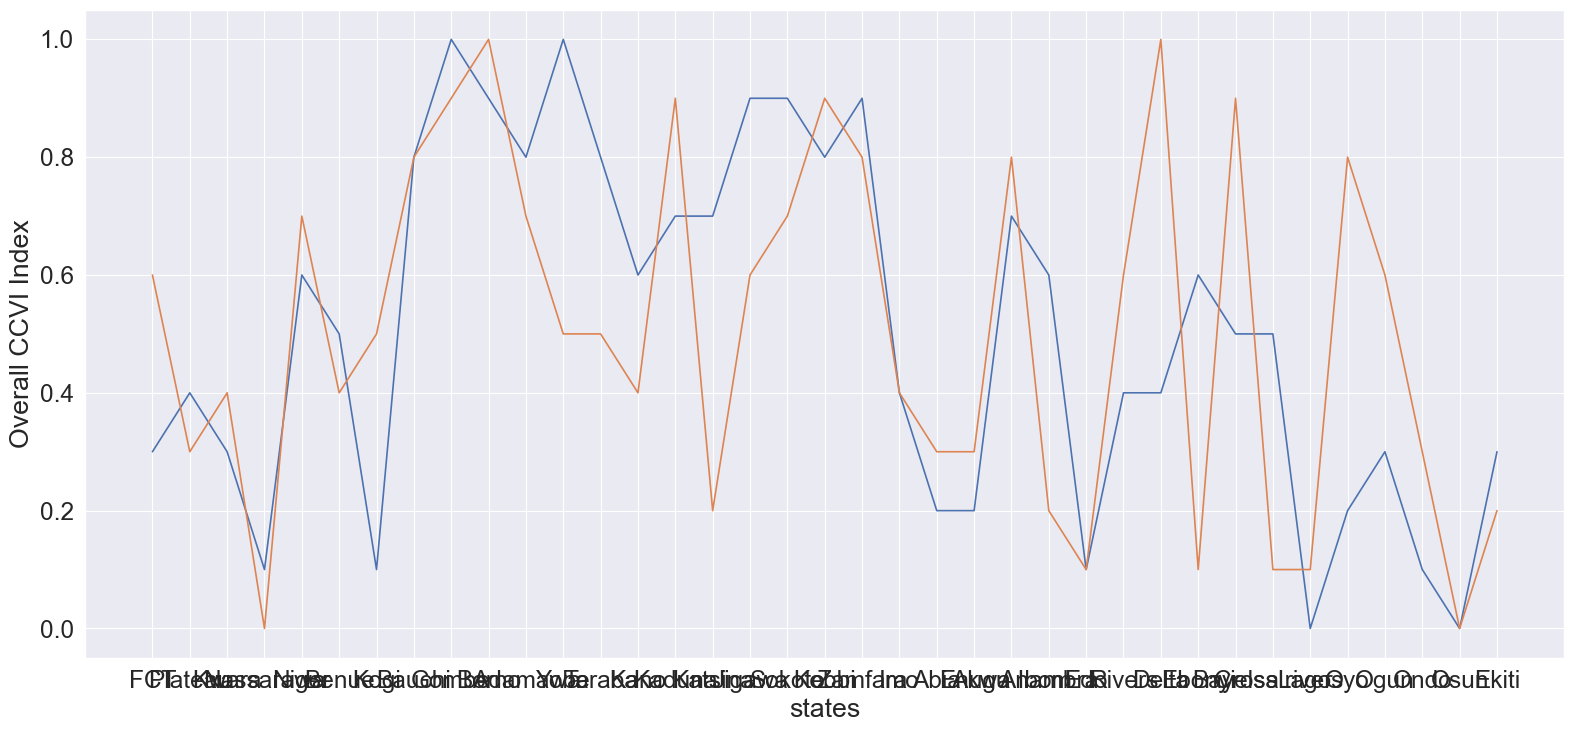

In [70]:
sns.lineplot(data=covid_external, x='states', y='Overall CCVI Index')
sns.lineplot(data=covid_external, x='states', y='Health System')

<h3>BUDGET</h3>

In [71]:
datasets.keys()

dict_keys(['covid_external', 'budget_data', 'real_gdp', 'confirmed', 'death', 'recovered', 'nigerian_covid'])

In [72]:
nigerian_covid

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104157,1014,102372,771
1,FCT,29504,15,29240,249
2,Rivers,18093,44,17894,155
3,Kaduna,11615,12,11514,89
4,Oyo,10336,2,10132,202
5,Plateau,10331,4,10252,75
6,Edo,7927,4,7601,322
7,Ogun,5810,11,5717,82
8,Delta,5808,526,5170,112
9,Kano,5344,97,5120,127


In [73]:
budget_covid_df = pd.merge(nigerian_covid, budget_data,left_on='States Affected', right_on='states')

In [74]:
budget_covid_df.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths',
       'states', 'Initial_budget (Bn)', 'Revised_budget (Bn)'],
      dtype='object')

<AxesSubplot:xlabel='No. of Cases (Lab Confirmed)', ylabel='Revised_budget (Bn)'>

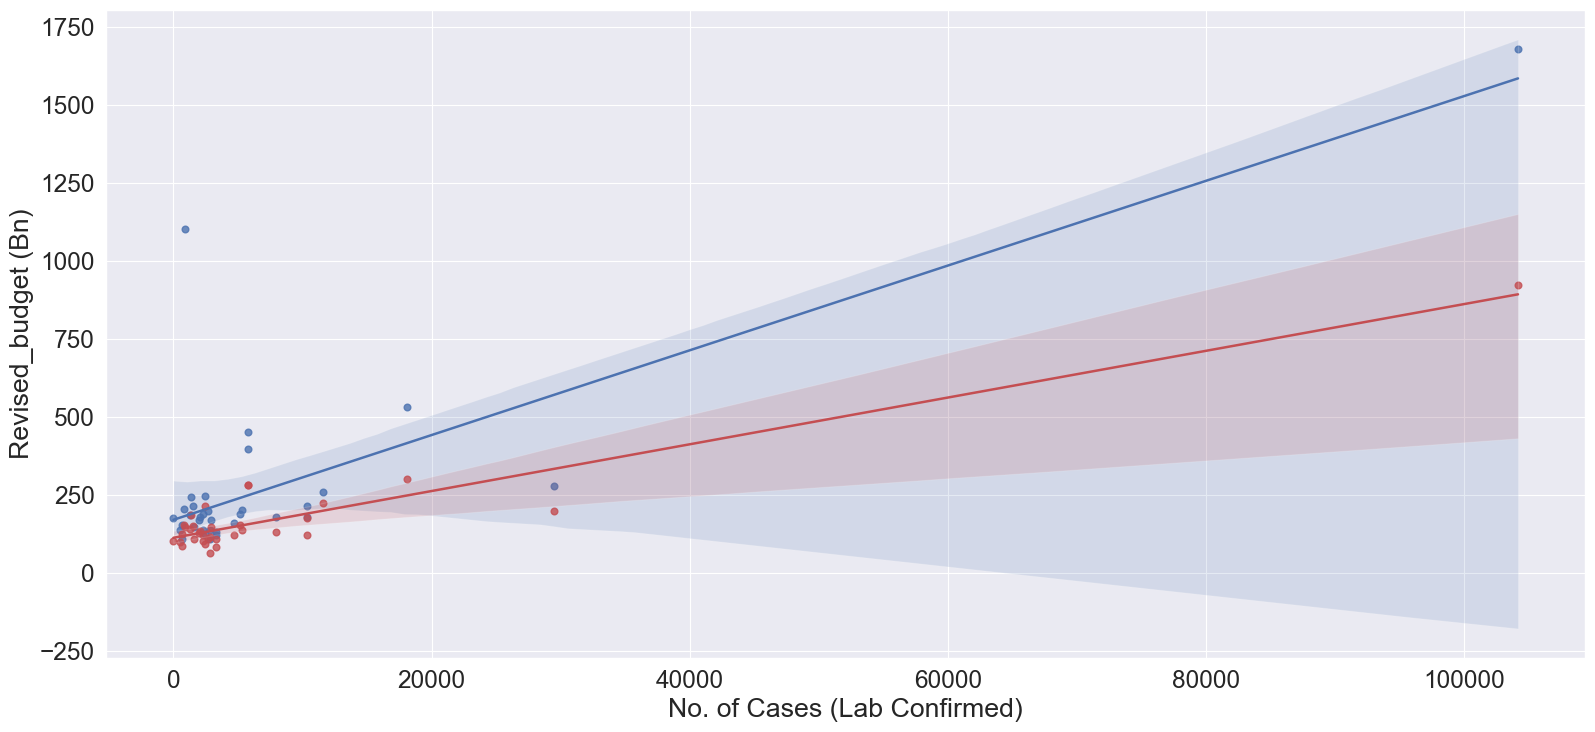

In [75]:
ax=sns.regplot(data=budget_covid_df, x='No. of Cases (Lab Confirmed)', y='Initial_budget (Bn)', label='Initial')
#ax2=ax.twinx()
sns.regplot(data=budget_covid_df, x='No. of Cases (Lab Confirmed)', y='Revised_budget (Bn)', color='r', label='Revised')


In [76]:
budget_covid_df.corr(method='spearman')

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Initial_budget (Bn),Revised_budget (Bn)
No. of Cases (Lab Confirmed),1.000000,0.382556,0.997555,0.879089,0.380290,0.460657
No. of Cases (on admission),0.382556,1.000000,0.353329,0.390309,0.214078,0.229228
No. Discharged,0.997555,0.353329,1.000000,0.876338,0.387319,0.467380
No. of Deaths,0.879089,0.390309,0.876338,1.000000,0.436717,0.481351
Initial_budget (Bn),0.380290,0.214078,0.387319,0.436717,1.000000,0.906188
Revised_budget (Bn),0.460657,0.229228,0.467380,0.481351,0.906188,1.000000


In [77]:
budget_covid_df.nlargest(10, 'Revised_budget (Bn)')

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states,Initial_budget (Bn),Revised_budget (Bn)
0,Lagos,104157,1014,102372,771,Lagos,1680.00,920.50
2,Rivers,18093,44,17894,155,Rivers,530.80,300.40
8,Delta,5808,526,5170,112,Delta,395.50,282.30
7,Ogun,5810,11,5717,82,Ogun,449.90,280.00
3,Kaduna,11615,12,11514,89,Kaduna,259.25,223.60
19,Katsina,2418,0,2381,37,Katsina,244.00,213.00
1,FCT,29504,15,29240,249,FCT,278.78,199.00
26,Bayelsa,1368,5,1335,28,Bayelsa,242.18,183.15
4,Oyo,10336,2,10132,202,Oyo,213.00,174.00
29,Sokoto,822,0,794,28,Sokoto,202.40,153.00


<h2> DESCRIPTIVE </h2>

In [78]:
datasets.keys()

dict_keys(['covid_external', 'budget_data', 'real_gdp', 'confirmed', 'death', 'recovered', 'nigerian_covid'])

In [79]:
recovered_.max()

Date     2022-11-06 00:00:00
Cases                 165208
dtype: object

In [80]:
confirmed_.max()

Date              2022-11-06 00:00:00
Cases                          266192
Differential                   6158.0
Infection Rate                 6158.0
dtype: object

In [81]:
death_.max()

Date            2022-11-06 00:00:00
Cases                          3155
Death Cases                    3155
Differential                   93.0
Death Rate                     93.0
dtype: object

In [82]:
nigerian_covid.sum()

States Affected                 LagosFCTRiversKadunaOyoPlateauEdoOgunDeltaKano...
No. of Cases (Lab Confirmed)                                               266138
No. of Cases (on admission)                                                  3523
No. Discharged                                                             259460
No. of Deaths                                                                3155
dtype: object

In [83]:
259460/266138

0.9749077546235412

In [84]:
3155/266138

0.011854752045931059

In [85]:
lowest_10_lab_confirmed = nigerian_covid.sort_values('No. of Cases (Lab Confirmed)', ascending=True).head(10)

<AxesSubplot:xlabel='States Affected', ylabel='No. of Cases (Lab Confirmed)'>

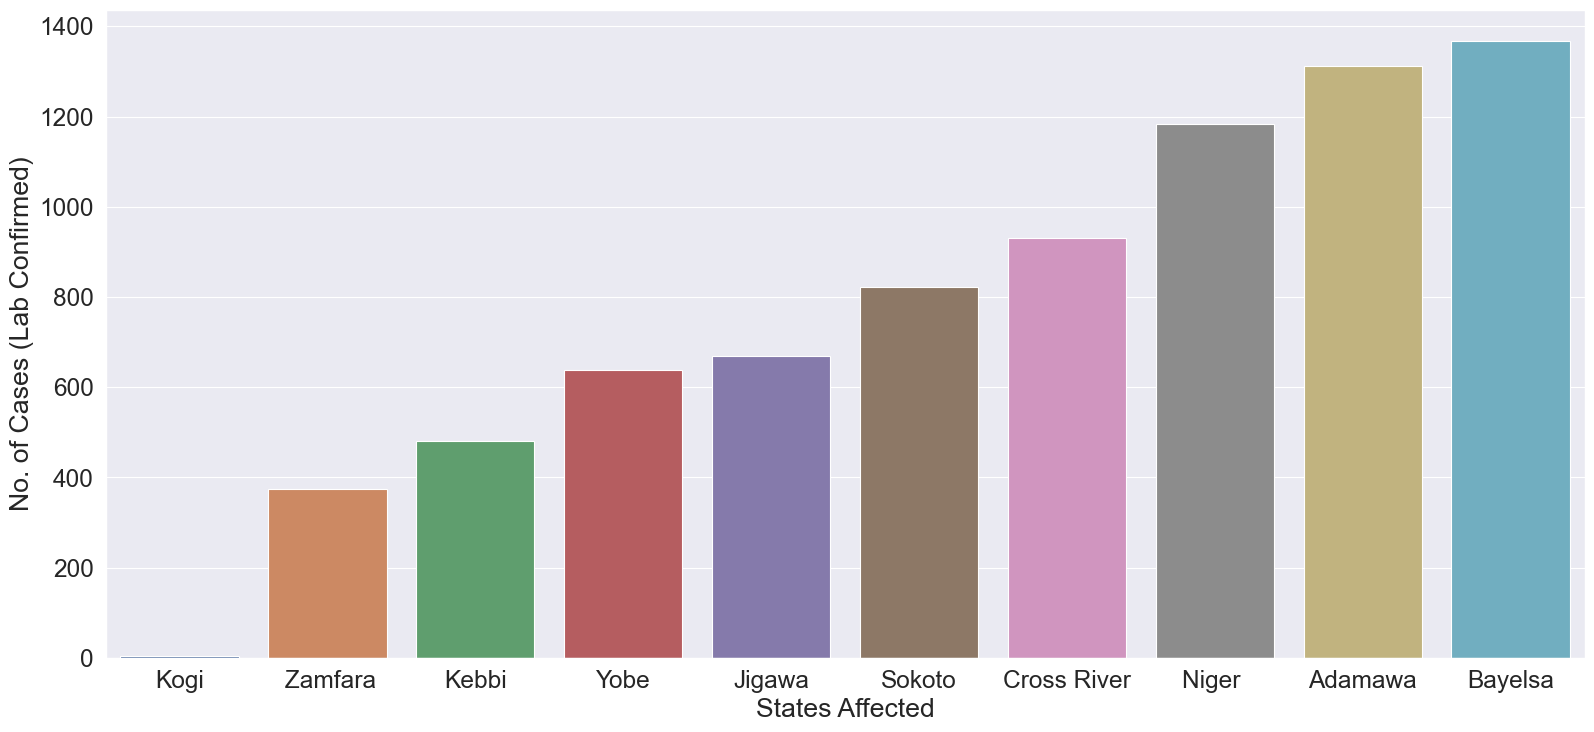

In [86]:
sns.barplot(data=lowest_10_lab_confirmed, y='No. of Cases (Lab Confirmed)', x='States Affected')

In [87]:
nigerian_covid

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104157,1014,102372,771
1,FCT,29504,15,29240,249
2,Rivers,18093,44,17894,155
3,Kaduna,11615,12,11514,89
4,Oyo,10336,2,10132,202
5,Plateau,10331,4,10252,75
6,Edo,7927,4,7601,322
7,Ogun,5810,11,5717,82
8,Delta,5808,526,5170,112
9,Kano,5344,97,5120,127


In [88]:
nigerian_covid['Death Rate'] = nigerian_covid['No. of Deaths']/nigerian_covid['No. of Cases (Lab Confirmed)']

In [89]:
nigerian_covid.sum()

States Affected                 LagosFCTRiversKadunaOyoPlateauEdoOgunDeltaKano...
No. of Cases (Lab Confirmed)                                               266138
No. of Cases (on admission)                                                  3523
No. Discharged                                                             259460
No. of Deaths                                                                3155
Death Rate                                                               1.055177
dtype: object

In [90]:
nigerian_covid.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Death Rate
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,7192.918919,95.216216,7012.432432,85.270270,0.028518
std,17328.947455,205.334975,17056.921740,134.897008,0.063341
min,5.000000,-1.000000,3.000000,2.000000,0.006726
25%,1368.000000,3.000000,1335.000000,25.000000,0.011354
50%,2691.000000,11.000000,2436.000000,38.000000,0.016906
75%,5344.000000,52.000000,5120.000000,89.000000,0.024000
max,104157.000000,1014.000000,102372.000000,771.000000,0.400000


<AxesSubplot:xlabel='No. of Cases (Lab Confirmed)'>

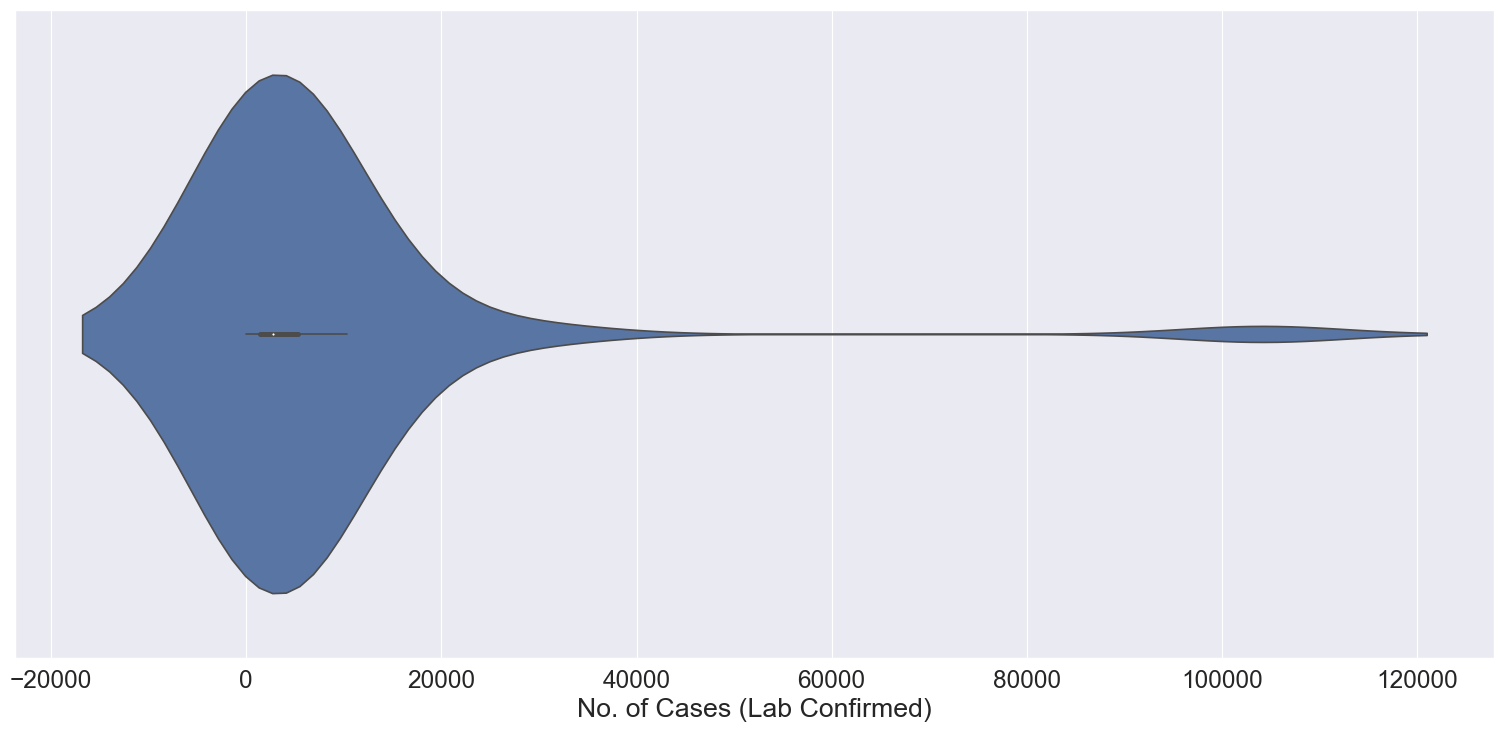

In [91]:
sns.violinplot(nigerian_covid['No. of Cases (Lab Confirmed)'])

<AxesSubplot:xlabel='Death Rate'>

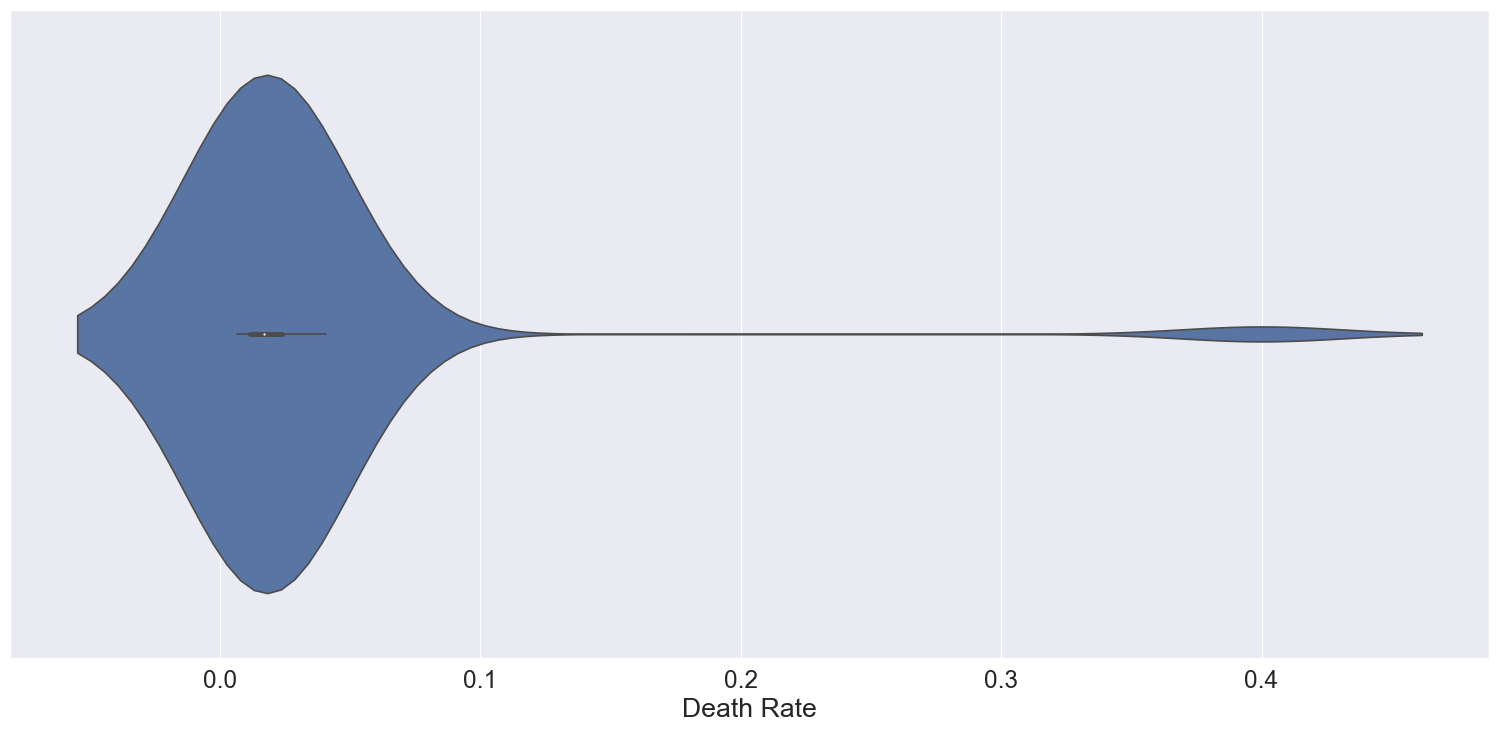

In [92]:
sns.violinplot(nigerian_covid['Death Rate'])

In [93]:
nigerian_covid.sort_values(by='Death Rate')

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Death Rate
16,Anambra,2825,46,2760,19,0.006726
5,Plateau,10331,4,10252,75,0.007260
0,Lagos,104157,1014,102372,771,0.007402
3,Kaduna,11615,12,11514,89,0.007663
1,FCT,29504,15,29240,249,0.008440
2,Rivers,18093,44,17894,155,0.008567
11,Akwa Ibom,5010,6,4960,44,0.008782
15,Enugu,2952,13,2910,29,0.009824
21,Benue,2317,88,2204,25,0.010790
19,Ekiti,2466,2,2436,28,0.011354
